# Project Name: Prediction of Heart Attack


Heart disease is one of the leading causes of death worldwide. Early prediction of heart attack
risk can significantly improve patient outcomes by enabling timely medical intervention and
lifestyle changes. By analysing various medical and demographic factors, it is possible to
develop a predictive model that can estimate the likelihood of a heart attack.

# Objective

The objective of this project is to develop a machine learning model that can predict the risk of
a heart attack based on a set of medical and demographic variables. The model will be trained
on historical patient data and will aim to provide accurate predictions to aid healthcare
professionals in assessing patient risk.

# Problem Statement

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set (color_codes = True)
import warnings 
warnings.filterwarnings('ignore')
import plotly as ply

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\nidhi\\Downloads\\project'

In [4]:
os.chdir('C:\\Users\\nidhi\\Downloads\\project\\\Mentornes')

In [5]:
os.getcwd()

'C:\\Users\\nidhi\\Downloads\\project\\Mentornes'

In [6]:
import pandas as pd

file_path = 'C:\\Users\\nidhi\\Downloads\\project\\Mentornes\\Heart attack prediction.xlsx'

try:
    df = pd.read_excel(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"File not found: {file_path}")


File loaded successfully.


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape
#there are 302 rows and 14 columns

(302, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [11]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [12]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

In [13]:
#since there are  4vvalues in dataset 
#we can replace 4 with NaN

In [14]:
df['ca'].replace(to_replace=4,value=np.nan,inplace=True)

In [15]:
df['ca'].value_counts()

0.0    175
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [16]:
df['thal'].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [17]:
#since there are 3vvalues in dataset 
#we can replace 0 with NaN

In [18]:
df['thal'].replace(to_replace = 0, value=np.nan,inplace=True)

In [19]:
df['thal'].value_counts()

2.0    165
3.0    117
1.0     18
Name: thal, dtype: int64

In [20]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

# Check for duplicates

In [21]:
df.duplicated().any()

False

# Check and impute missing value

In [22]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
target      False
dtype: bool

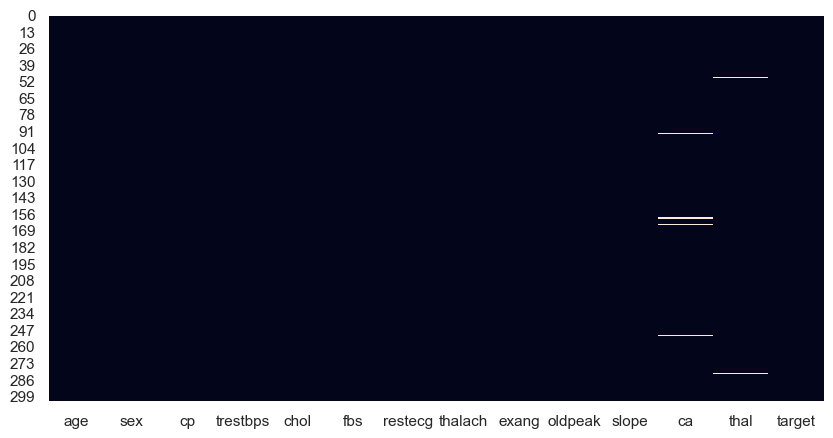

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [24]:
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percentage_of_missing_data'])
missing_data['Types']=df[missing_data.index].dtypes
missing_data

,Total,Percentage_of_missing_data,Types
ca,4,1.324503,float64
thal,2,0.662252,float64
age,0,0.000000,int64
sex,0,0.000000,int64
cp,0,0.000000,int64
trestbps,0,0.000000,int64
chol,0,0.000000,int64
fbs,0,0.000000,int64
restecg,0,0.000000,int64
thalach,0,0.000000,int64


In [25]:
df['ca'].fillna(df['ca'].median(),inplace=True)
df['thal'].fillna(df['thal'].mean(),inplace=True)

In [26]:
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percentage_of_missing_data'])
missing_data['Types']=df[missing_data.index].dtypes
missing_data

,Total,Percentage_of_missing_data,Types
age,0,0.0,int64
sex,0,0.0,int64
cp,0,0.0,int64
trestbps,0,0.0,int64
chol,0,0.0,int64
fbs,0,0.0,int64
restecg,0,0.0,int64
thalach,0,0.0,int64
exang,0,0.0,int64
oldpeak,0,0.0,float64


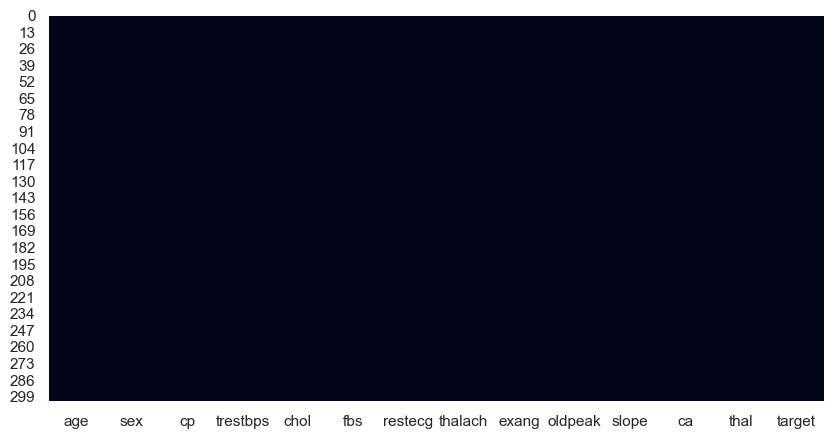

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False)
plt.show()

# Split the datatype

In [28]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          4
target        2
dtype: int64

In [29]:
df_cat=df[['sex','cp','fbs','restecg','exang','slope','ca','thal']].astype('object')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sex      302 non-null    object
 1   cp       302 non-null    object
 2   fbs      302 non-null    object
 3   restecg  302 non-null    object
 4   exang    302 non-null    object
 5   slope    302 non-null    object
 6   ca       302 non-null    object
 7   thal     302 non-null    object
dtypes: object(8)
memory usage: 19.0+ KB


In [30]:
df_num=df[['age','trestbps','chol','thalach','oldpeak']].astype(np.number)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   trestbps  302 non-null    float64
 2   chol      302 non-null    float64
 3   thalach   302 non-null    float64
 4   oldpeak   302 non-null    float64
dtypes: float64(5)
memory usage: 11.9 KB


# Univariate Analysis

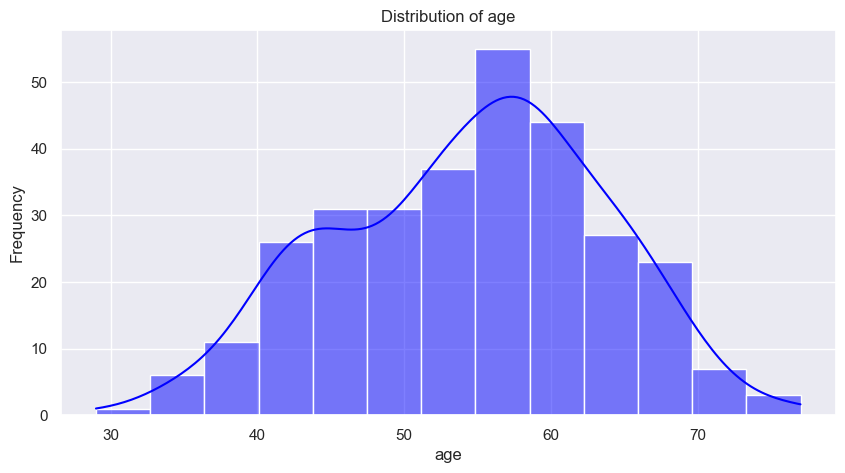

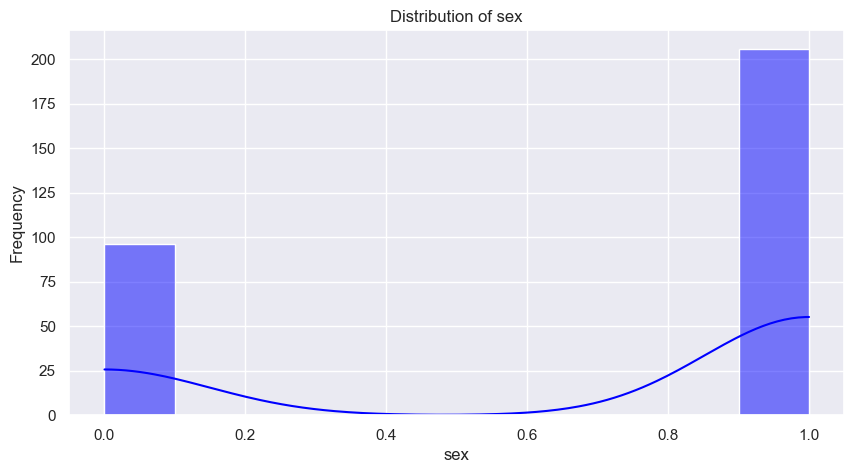

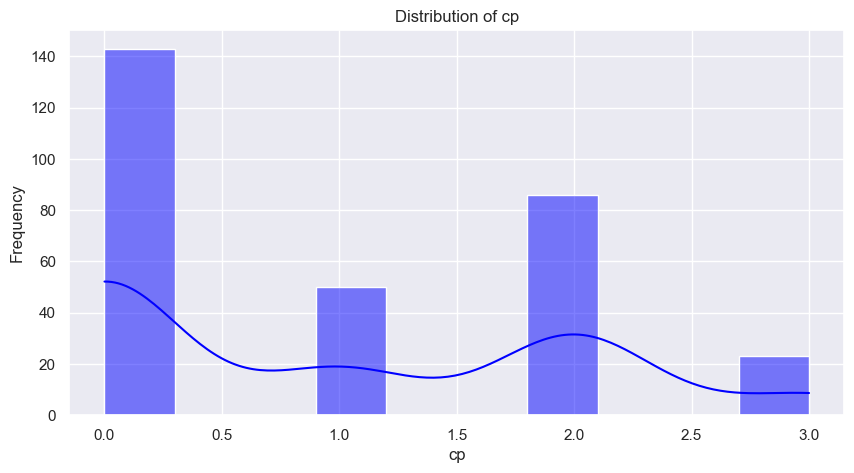

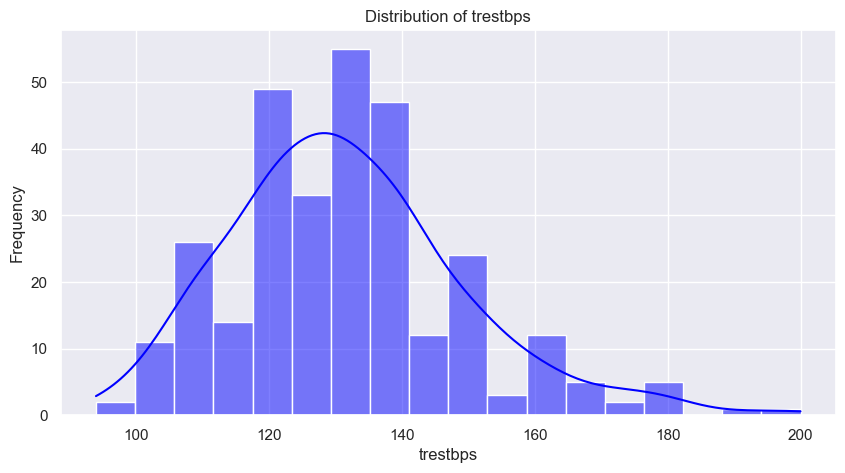

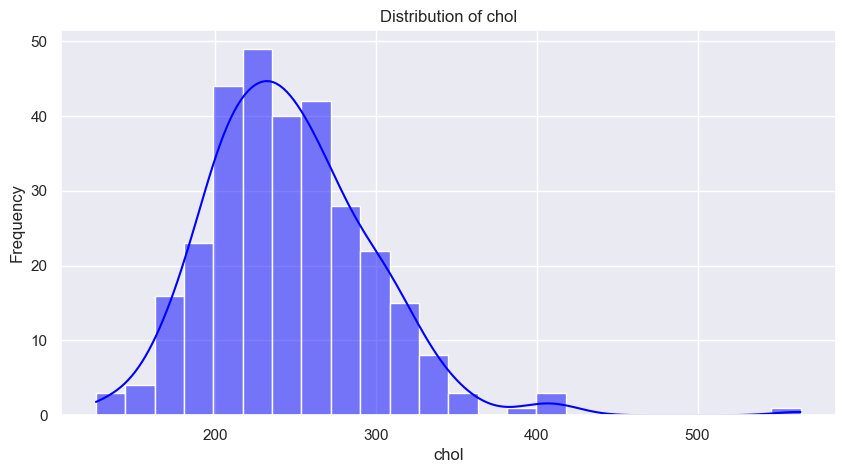

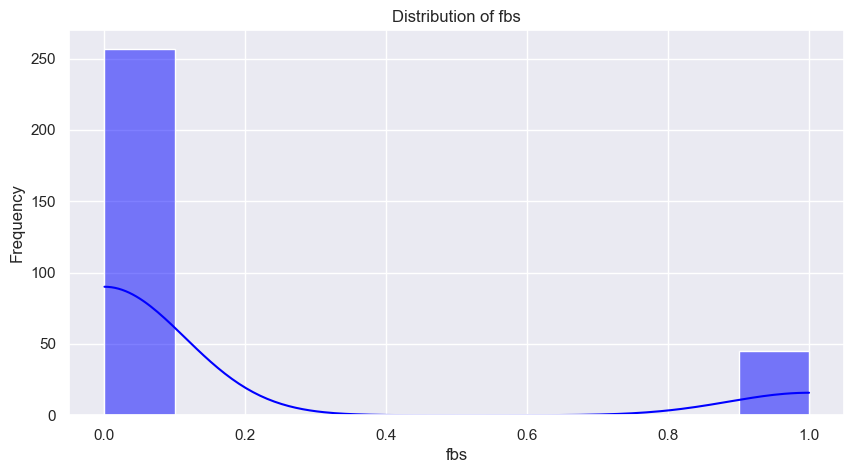

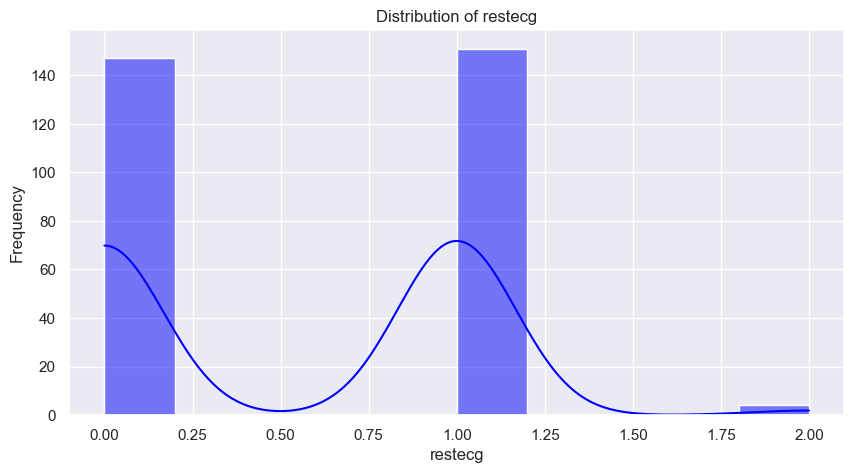

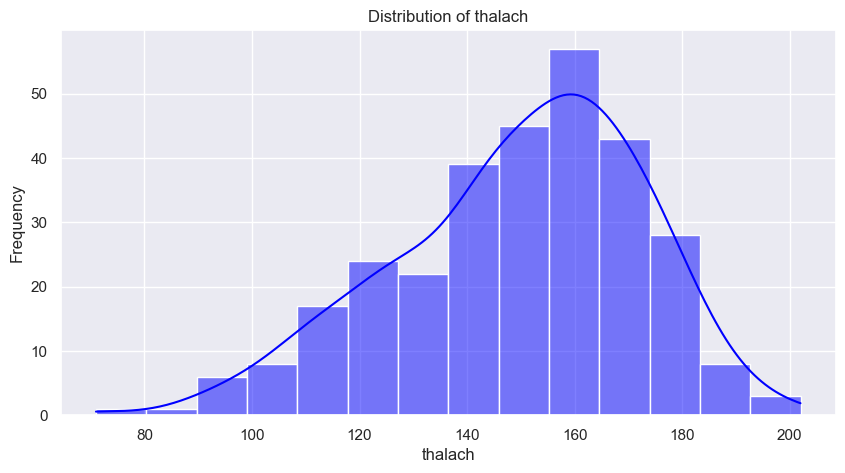

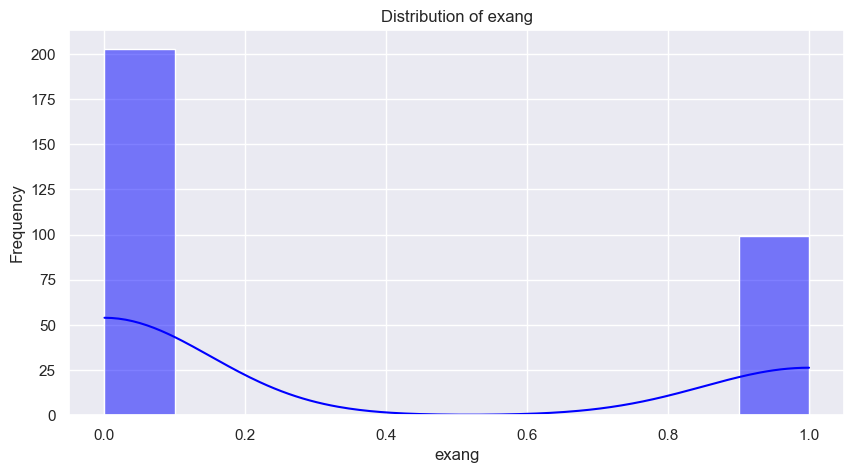

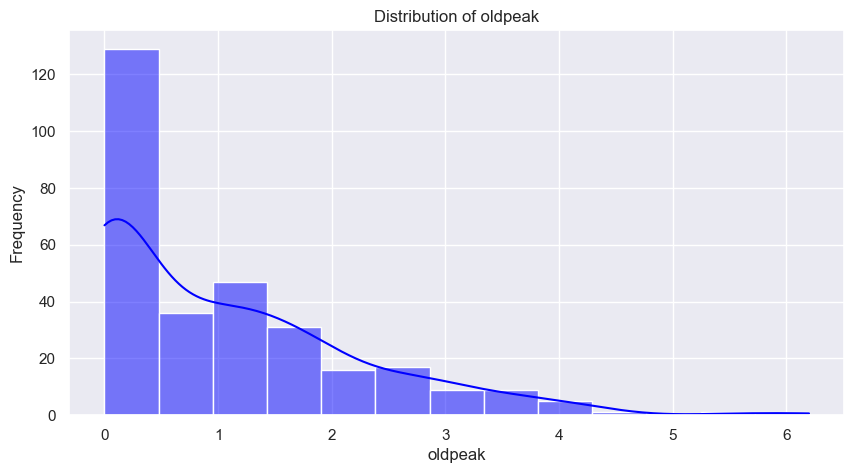

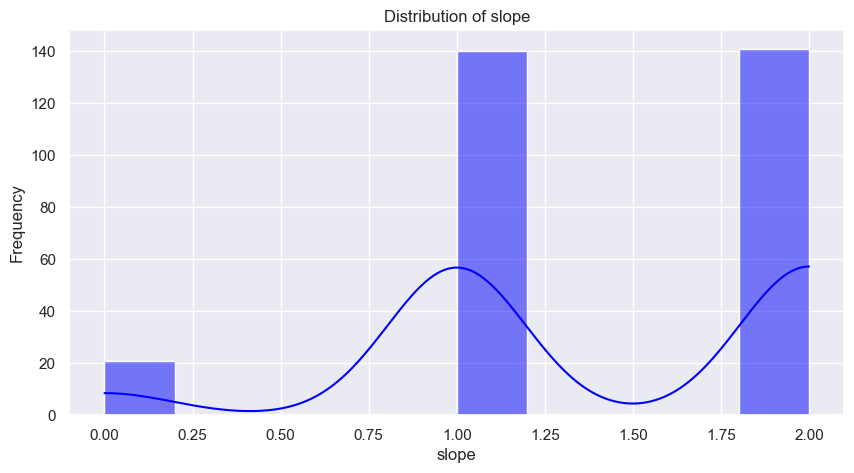

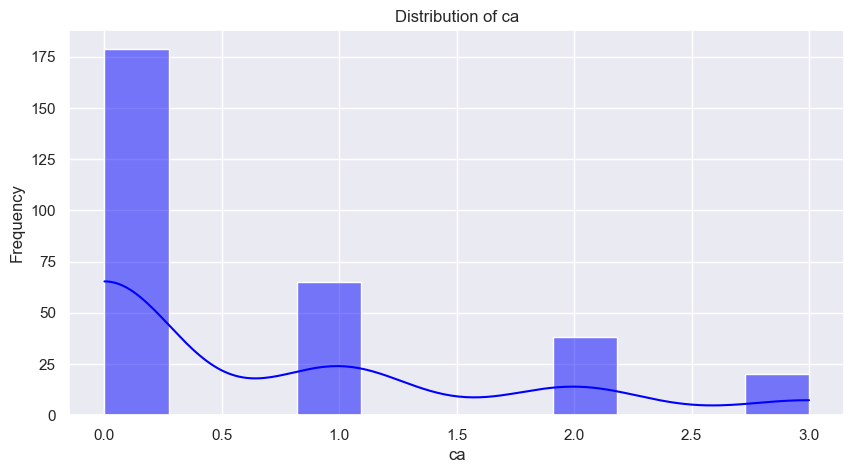

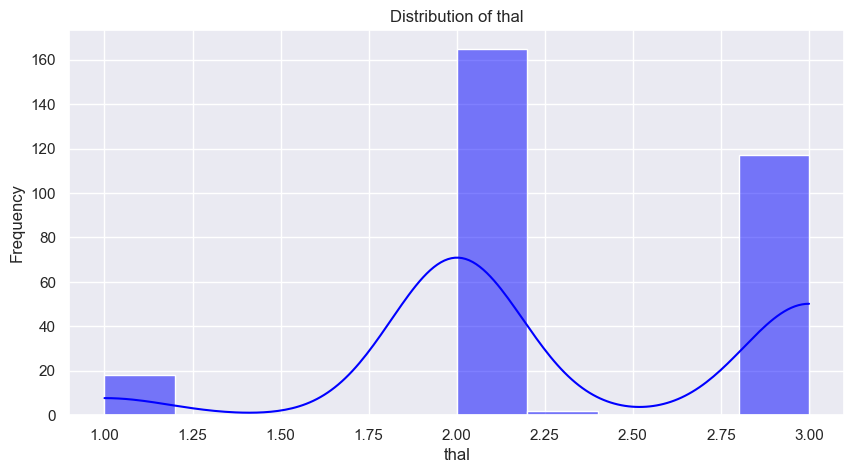

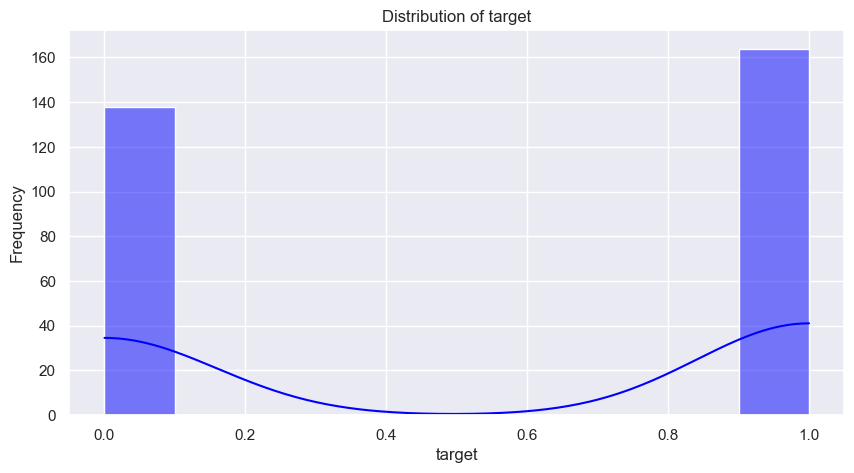

In [31]:
for col in df:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True,color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Bivariate analysis

In [32]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

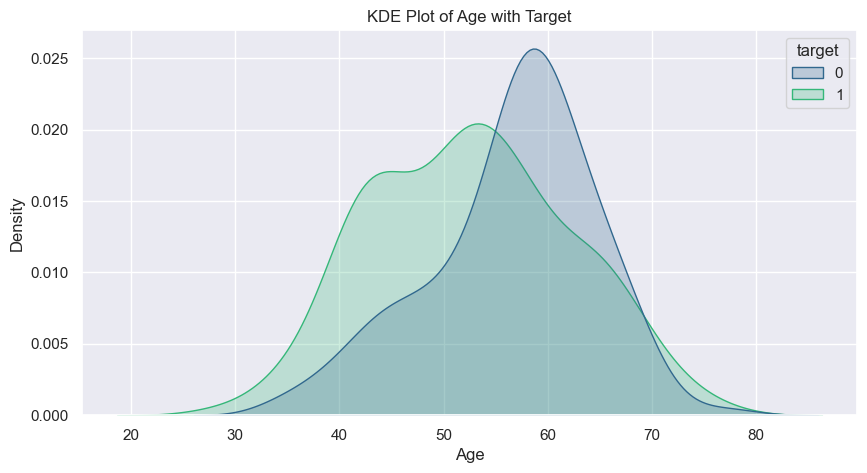

In [33]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='age', hue='target', fill=True, palette='viridis')
plt.title('KDE Plot of Age with Target')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

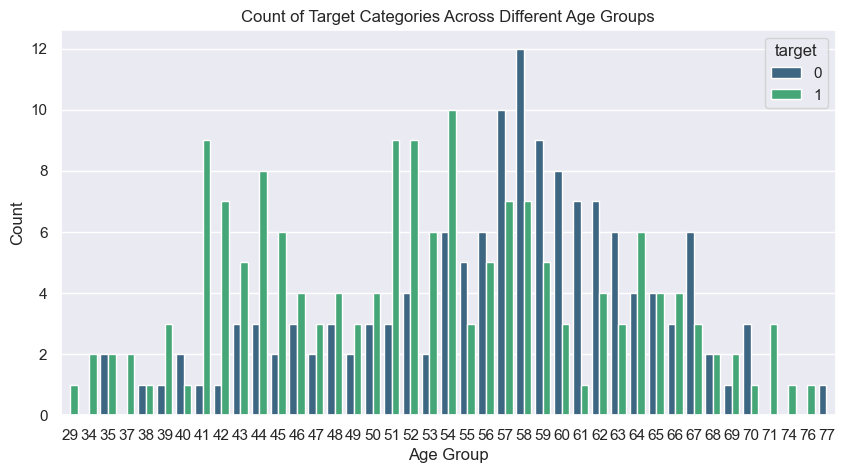

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(x='age', hue='target', data=df, palette='viridis')
plt.title('Count of Target Categories Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()



In [35]:
#we could observe that middle age group people are more risk to heart attack

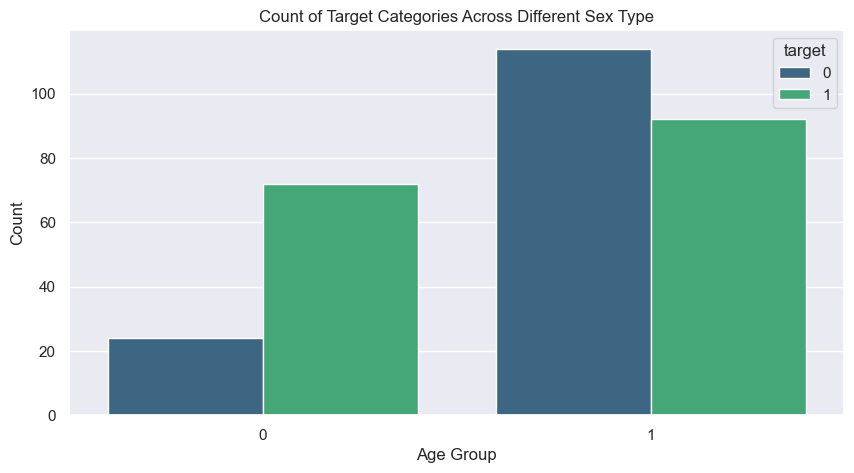

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(x='sex', hue='target', data=df, palette='viridis')
plt.title('Count of Target Categories Across Different Sex Type')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [37]:
#male are seen to be higher risk of heart attack
#whereas within the gender we obsereve females are having higher risk of heart attack

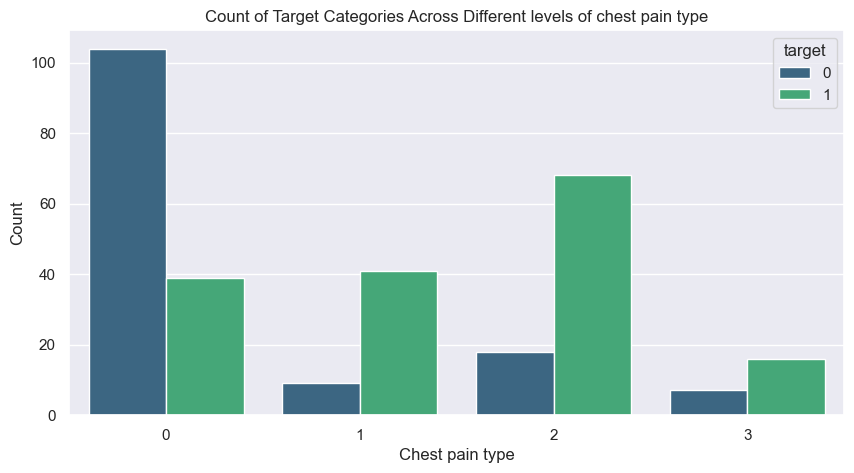

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='cp', hue='target', data=df, palette='viridis')
plt.title('Count of Target Categories Across Different levels of chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Count')
plt.show()

In [39]:
df.pivot_table(index='cp', columns='target', aggfunc='size', fill_value=0)

target,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


In [40]:
# when the chest pain level increase then their are higher possibilities of heart attack 
#mostly when its level 2 but it gradually reduce in level 3 

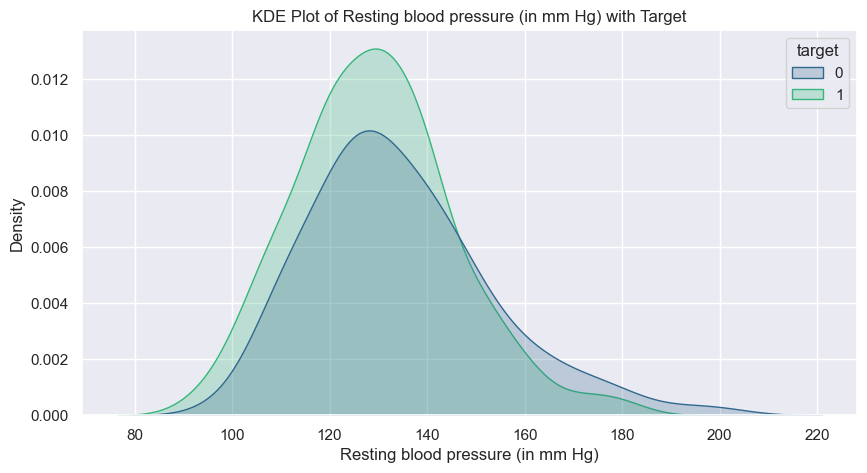

In [41]:
plt.figure(figsize=(10,5))
sns.kdeplot(x='trestbps',hue='target',data=df,palette='viridis',fill=True)
plt.title('KDE Plot of Resting blood pressure (in mm Hg) with Target')
plt.xlabel('Resting blood pressure (in mm Hg)')
plt.ylabel('Density')
plt.show()

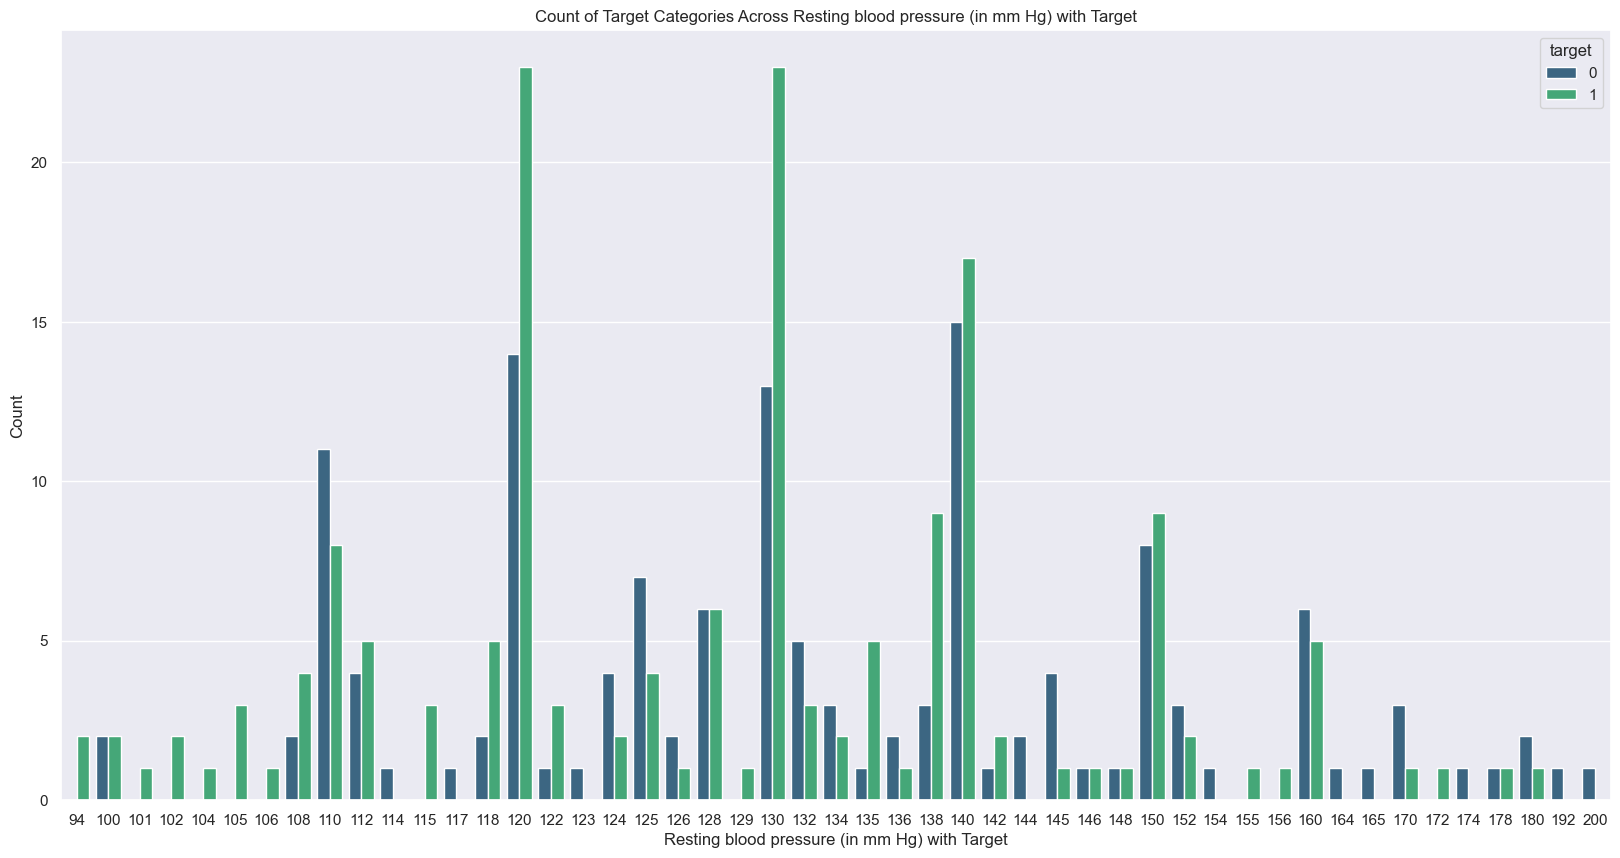

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(x='trestbps', hue='target', data=df, palette='viridis')
plt.title('Count of Target Categories Across Resting blood pressure (in mm Hg) with Target')
plt.xlabel('Resting blood pressure (in mm Hg) with Target')
plt.ylabel('Count')
plt.show()

In [43]:
#Resting blood pressure in heart attack patients are in the range of 94 to 180
#whereas in healthy heart resting blood pressure are in range of 100 to 200

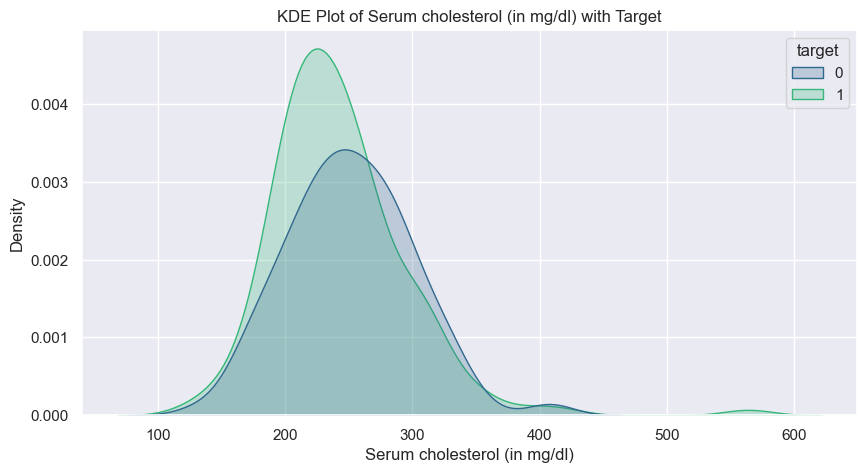

In [44]:
plt.figure(figsize=(10,5))
sns.kdeplot(x='chol',hue='target',data=df,palette='viridis',fill=True)
plt.title('KDE Plot of Serum cholesterol (in mg/dl) with Target')
plt.xlabel('Serum cholesterol (in mg/dl)')
plt.ylabel('Density')
plt.show()

In [45]:
#Serum cholesterol level in heart attack patients are in the range of 100 to 600
#whereas in healthy heart resting blood pressure are in range of 100 to 450

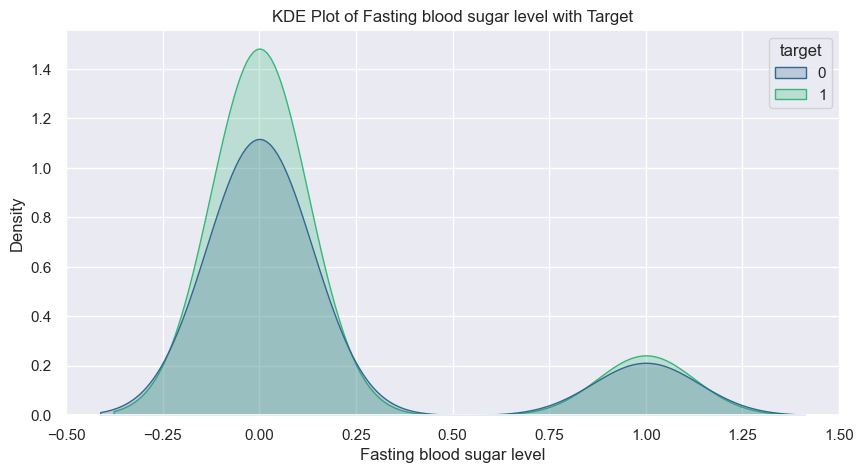

In [46]:
plt.figure(figsize=(10,5))
sns.kdeplot(x='fbs',hue='target',data=df,palette='viridis',fill=True)
plt.title('KDE Plot of Fasting blood sugar level with Target')
plt.xlabel('Fasting blood sugar level')
plt.ylabel('Density')
plt.show()


In [47]:
df.pivot_table(index='fbs', columns='target', aggfunc='size', fill_value=0)

target,0,1
fbs,,
0,116,141
1,22,23


In [48]:
#Fasting blood sugar level> 120mg/dl in heart attack patients

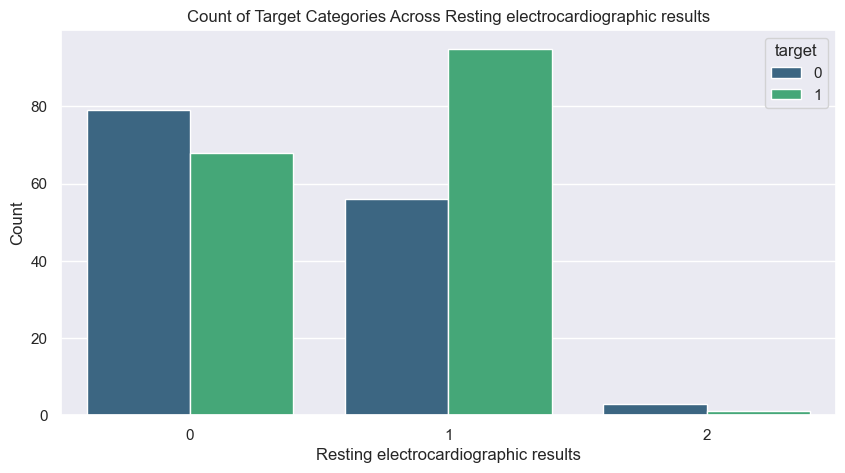

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x='restecg',hue='target',data=df,palette='viridis',fill=True)
plt.title('Count of Target Categories Across Resting electrocardiographic results')
plt.xlabel('Resting electrocardiographic results')
plt.ylabel('Count')
plt.show()


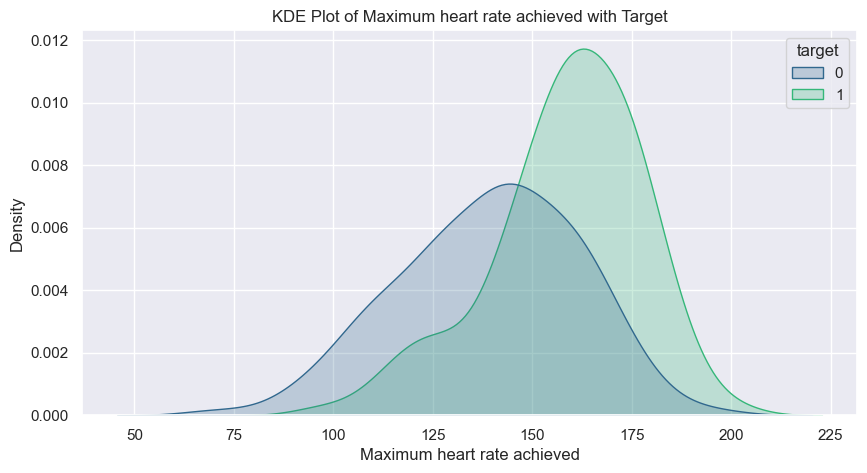

In [50]:
plt.figure(figsize=(10,5))
sns.kdeplot(x='thalach',hue='target',data=df,palette='viridis',fill=True)
plt.title('KDE Plot of Maximum heart rate achieved with Target')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Density')
plt.show()

In [51]:
#maximum heart rate in heart attack patients is high

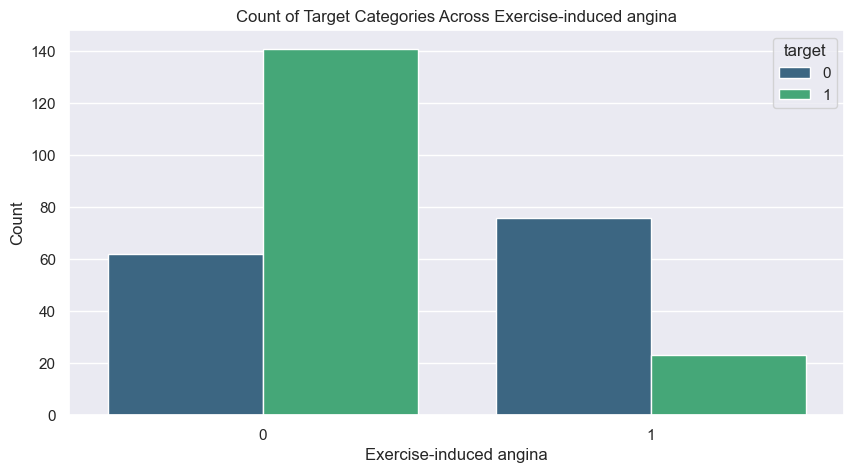

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x='exang',hue='target',data=df,palette='viridis',fill=True)
plt.title('Count of Target Categories Across Exercise-induced angina')
plt.xlabel('Exercise-induced angina')
plt.ylabel('Count')
plt.show()

In [53]:
#Excercise induced angina level is high in normal patients then heart attack patients
#whereas there was no increase of excercise induced angina is showing very high risk heart attack patients

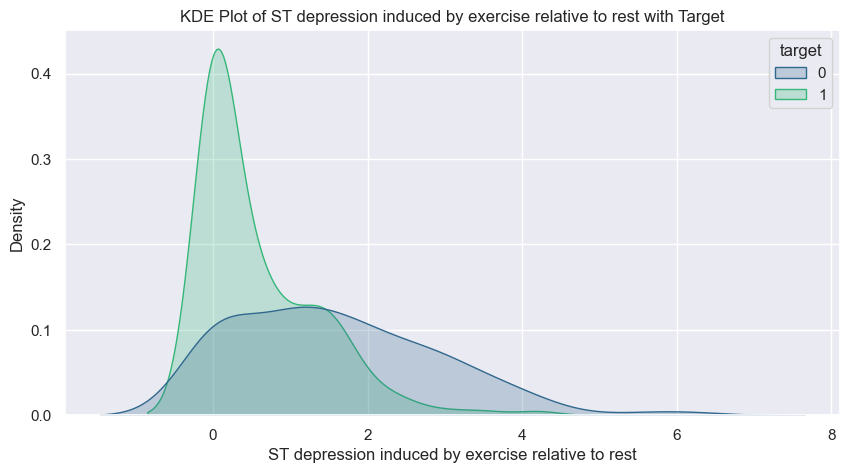

In [54]:
plt.figure(figsize=(10,5))
sns.kdeplot(x='oldpeak',hue='target',data=df,palette='viridis',fill=True)
plt.title('KDE Plot of ST depression induced by exercise relative to rest with Target')
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('Density')
plt.show()

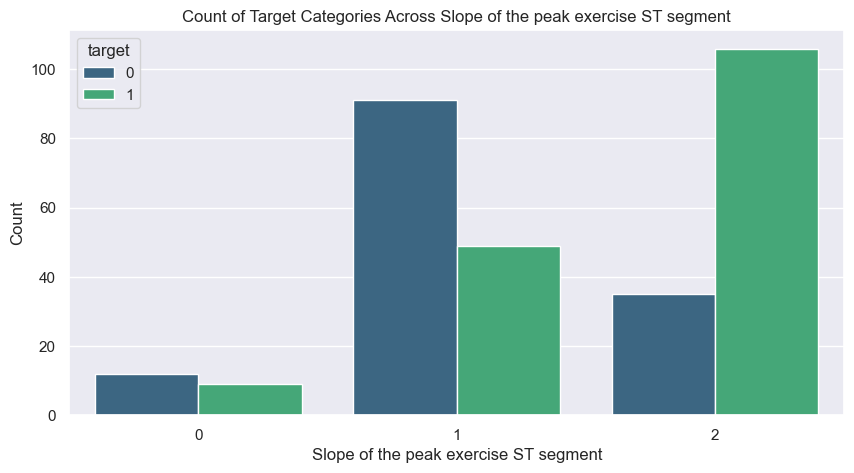

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x='slope',hue='target',data=df,palette='viridis',fill=True)
plt.title('Count of Target Categories Across Slope of the peak exercise ST segment')
plt.xlabel('Slope of the peak exercise ST segment')
plt.ylabel('Count')
plt.show()

In [56]:
#slope0-unslopping- where non prone to heart attacck patients are having higher in number
#slope1-flat- where ST segments are higher in non prone to heart attack patients
#slope2-downslopping in ST segment- it mostly be higher way in heart disease patients


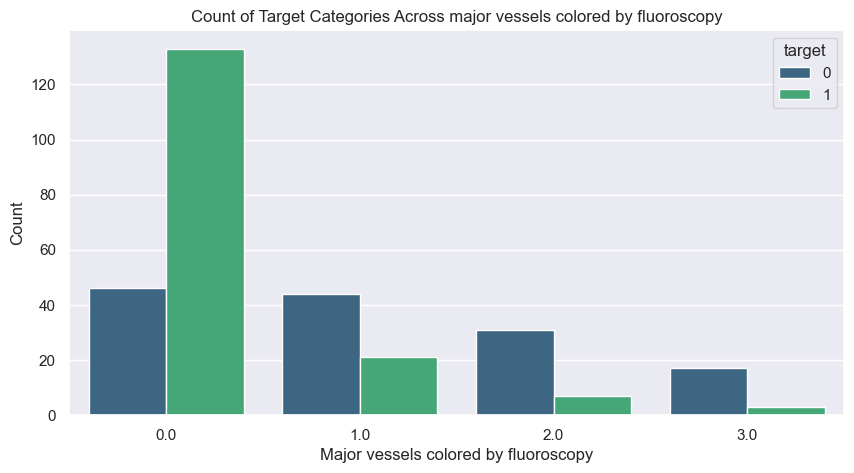

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x='ca',hue='target',data=df,palette='viridis',fill=True)
plt.title('Count of Target Categories Across major vessels colored by fluoroscopy')
plt.xlabel('Major vessels colored by fluoroscopy')
plt.ylabel('Count')
plt.show()

In [58]:
#Majority of non prone heart disease are having colored of 0.0

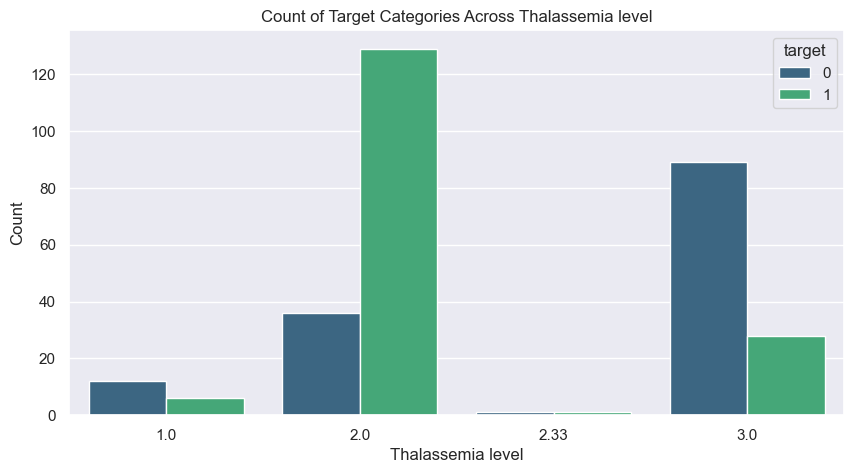

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x='thal',hue='target',data=df,palette='viridis',fill=True)
plt.title('Count of Target Categories Across Thalassemia level')
plt.xlabel('Thalassemia level')
plt.ylabel('Count')
plt.show()

In [60]:
df.pivot_table(index='thal', columns='target', aggfunc='size', fill_value=0)

target,0,1
thal,,
1.00,12,6
2.00,36,129
2.33,1,1
3.00,89,28


# Multivariate analysis

In [61]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [62]:
corr=df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.367313,0.063037,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.082978,0.211949,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.226091,-0.167673,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.101516,0.060653,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.126755,0.083058,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.139938,-0.008307,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.113629,-0.012348,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.264855,-0.116097,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.144385,0.226125,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.299605,0.207419,-0.429146


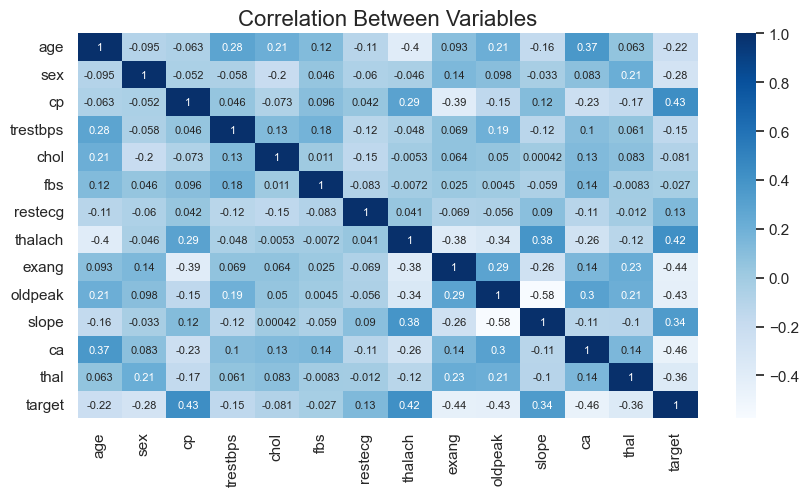

In [63]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='Blues', annot_kws={"size": 8})
plt.title('Correlation Between Variables', fontsize=16)
plt.show()

In [64]:
#cp,thalach are having positive correlation with the target variable
#exang,oldpeak,ca,thal are showing negative correlation with the target variable


In [65]:
df.cov()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,81.865757,-0.400761,-0.589283,44.991573,97.031561,0.385635,-0.531110,-81.904755,0.396570,2.165226,-0.915161,3.107885,0.332558,-0.999890
sex,-0.400761,0.217553,-0.024906,-0.472245,-4.720930,0.007657,-0.014807,-0.496095,0.031462,0.053264,-0.009483,0.036193,0.057641,-0.066005
cp,-0.589283,-0.024906,1.065114,0.842622,-3.882060,0.035346,0.022563,6.934435,-0.190678,-0.175836,0.074322,-0.218202,-0.100897,0.222503
trestbps,44.991573,-0.472245,0.842622,308.472817,113.853821,1.115883,-1.065851,-19.317793,0.565906,3.969653,-1.329960,1.667334,0.621130,-1.281842
chol,97.031561,-4.720930,-3.882060,113.853821,2678.423588,0.210963,-4.018272,-6.292359,1.559801,3.010631,0.013289,6.134551,2.506346,-2.102990
fbs,0.385635,0.007657,0.035346,1.115883,0.210963,0.127225,-0.015588,-0.058569,0.004147,0.001870,-0.012893,0.046677,-0.001728,-0.004774
restecg,-0.531110,-0.014807,0.022563,-1.065851,-4.018272,-0.015588,0.276705,0.496491,-0.017018,-0.034367,0.029306,-0.055895,-0.003787,0.035401
thalach,-81.904755,-0.496095,6.934435,-19.317793,-6.292359,-0.058569,0.496491,524.571561,-4.064399,-9.103003,5.430750,-5.672680,-1.550399,4.799322
exang,0.396570,0.031462,-0.190678,0.565906,1.559801,0.004147,-0.017018,-4.064399,0.221084,0.156606,-0.074212,0.063486,0.061993,-0.102198
oldpeak,2.165226,0.053264,-0.175836,3.969653,3.010631,0.001870,-0.034367,-9.103003,0.156606,1.348971,-0.412510,0.325408,0.140465,-0.248703


<Figure size 1000x500 with 0 Axes>

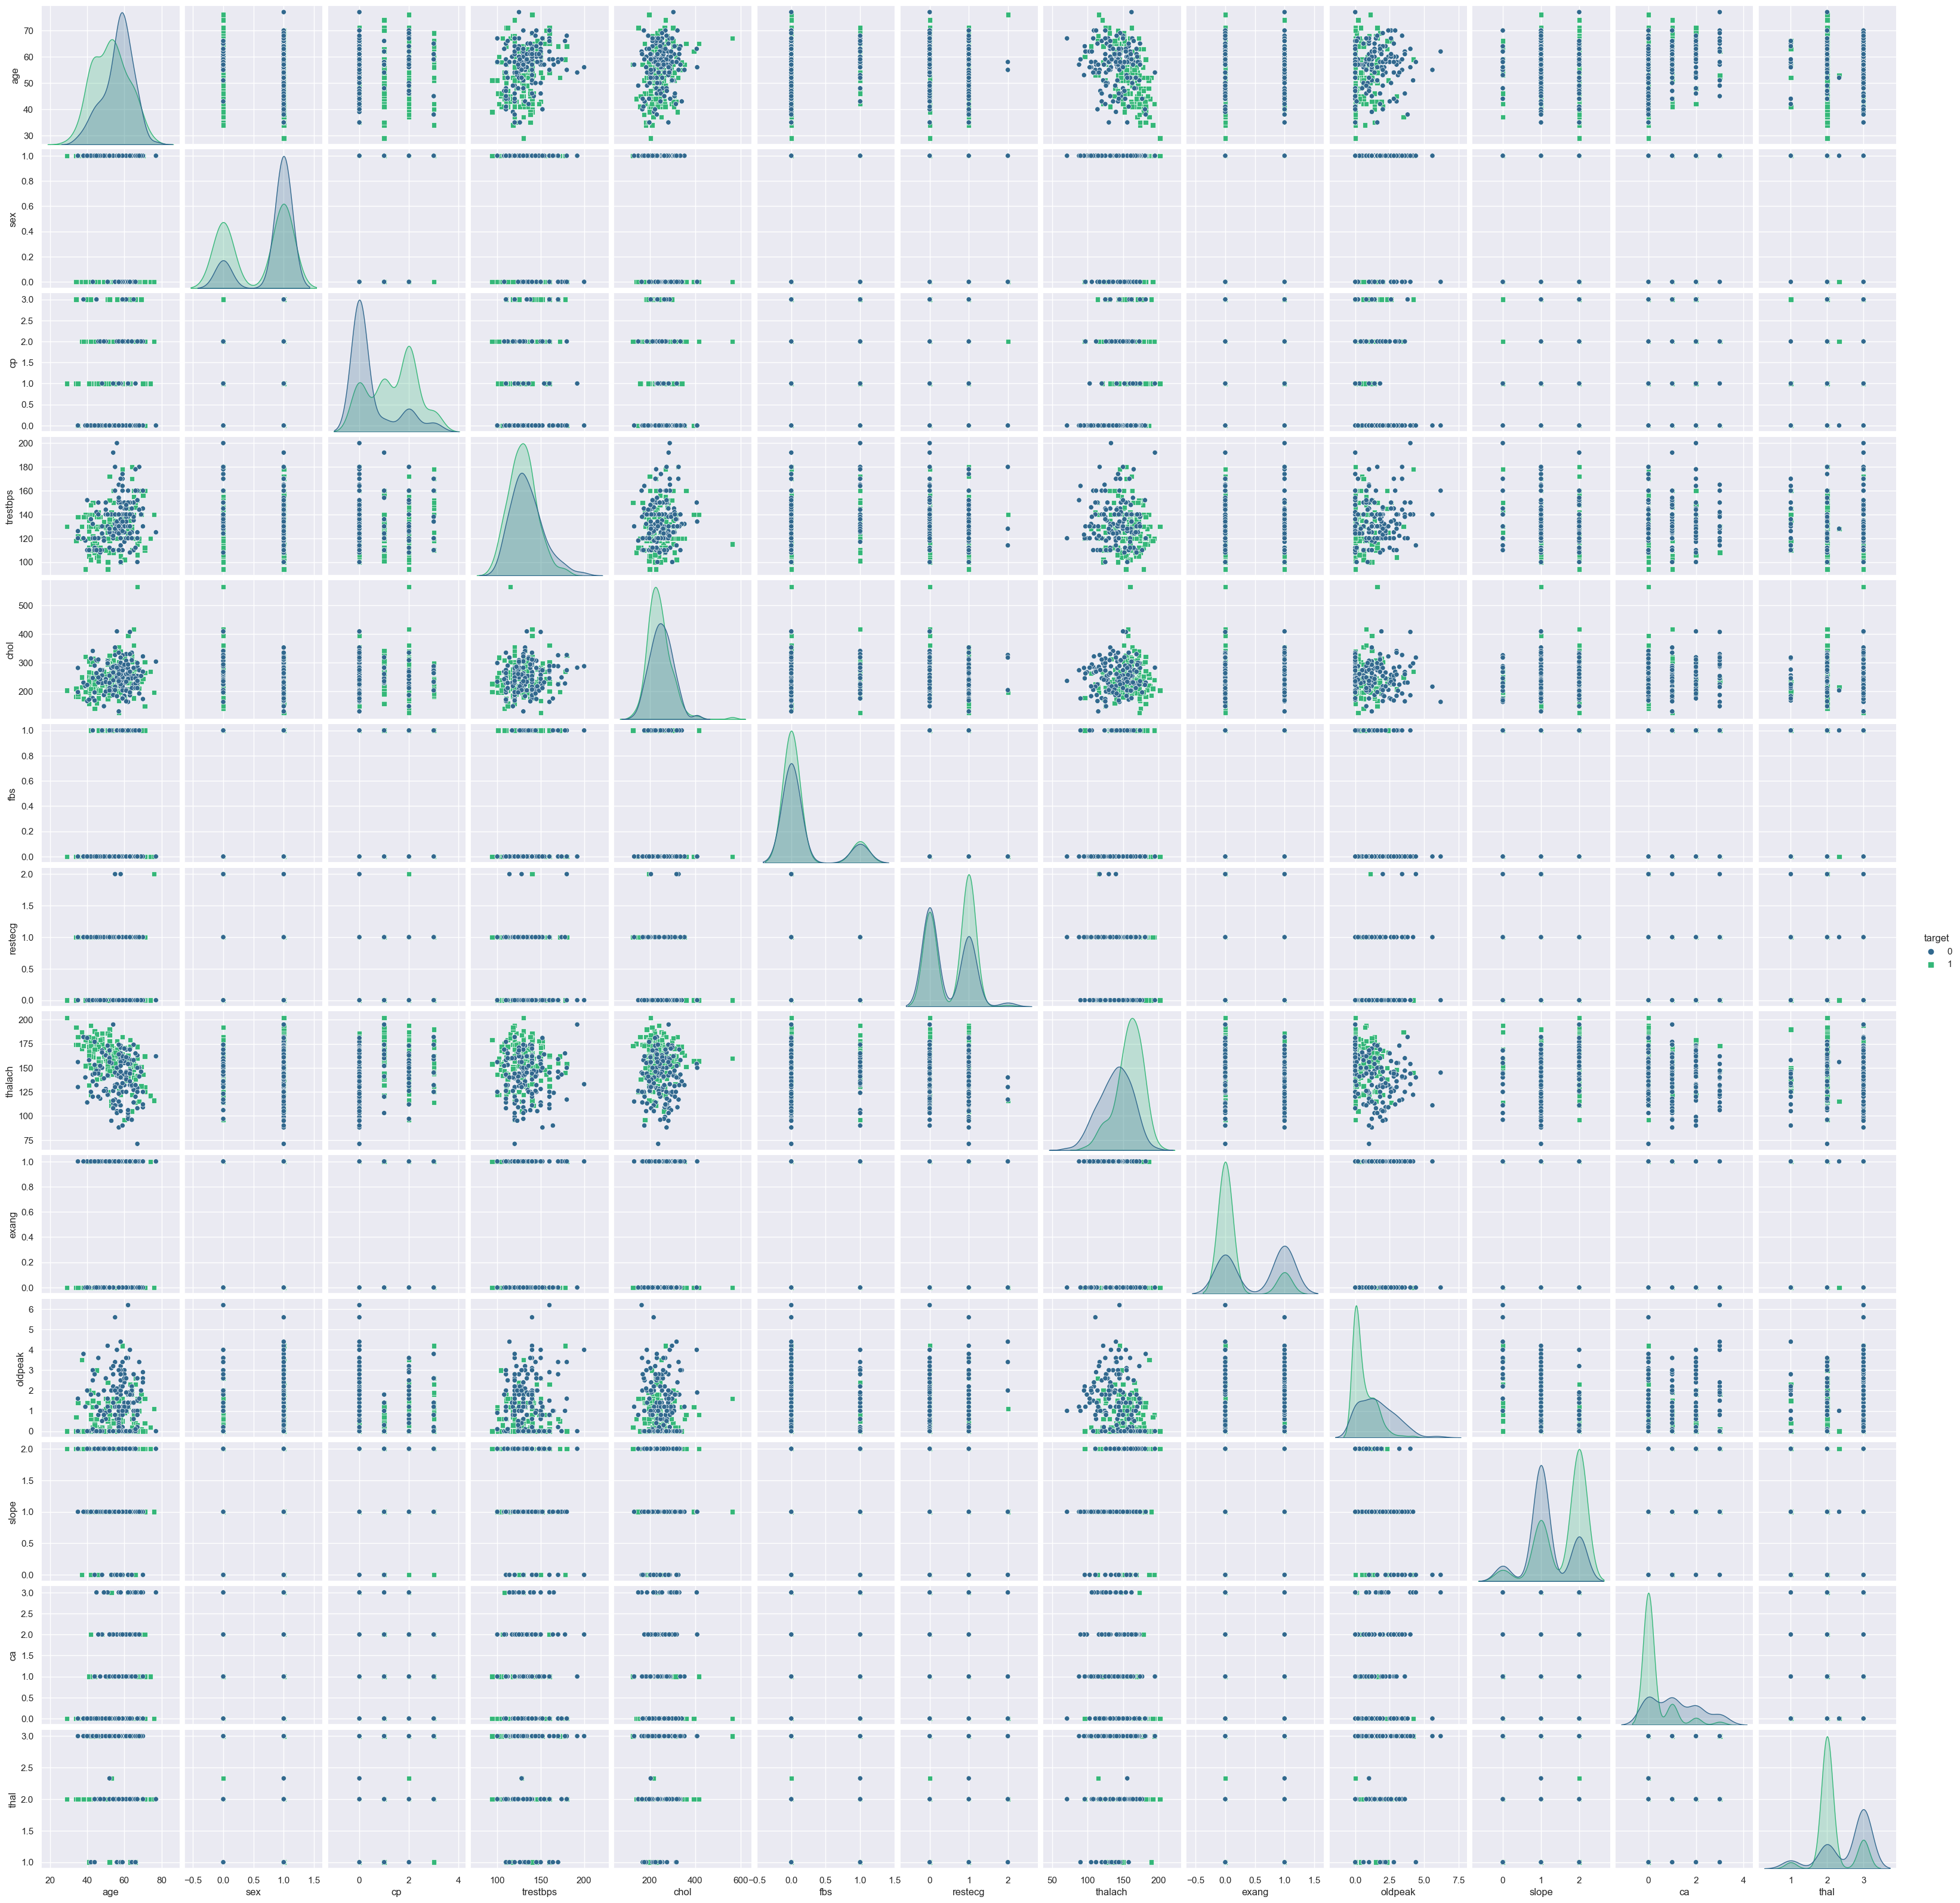

In [66]:
plt.figure(figsize=(10,5))
sns.pairplot(df, hue='target', markers=["o", "s"], diag_kind='kde',palette='viridis')
plt.show()

In [67]:
import scipy.stats as stats

In [68]:
variables = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

stat_values = []
p_values = []

for var in variables:
    group_0 = df[df['target'] == 0][var]
    group_1 = df[df['target'] == 1][var]

    stat, p_value = stats.levene(group_0, group_1)

    stat_values.append(stat)
    p_values.append(p_value)

results_df = pd.DataFrame({
    'Variable': variables,
    'Levene Statistic': stat_values,
    'P-value': p_values
})
print(results_df)

    Variable  Levene Statistic       P-value
0        age          7.634937  6.078538e-03
1        sex         26.240952  5.402436e-07
2         cp         12.479944  4.760921e-04
3   trestbps          1.791063  1.818101e-01
4       chol          0.122632  7.264426e-01
5        fbs          0.216045  6.424070e-01
6    restecg          0.228637  6.328849e-01
7    thalach          5.166054  2.373956e-02
8      exang         39.819724  9.982974e-10
9    oldpeak         32.438142  2.934214e-08
10     slope          1.171570  2.799480e-01
11        ca         53.875545  2.016888e-12
12      thal         14.079268  2.103772e-04


In [69]:
#Variables like age, sex, cp, thalach, exang, oldpeak, ca, and thal show significant variance differences between the target groups.
#Variables like trestbps, chol, fbs, restecg, and slope do not show significant variance differences

# Outlier detection

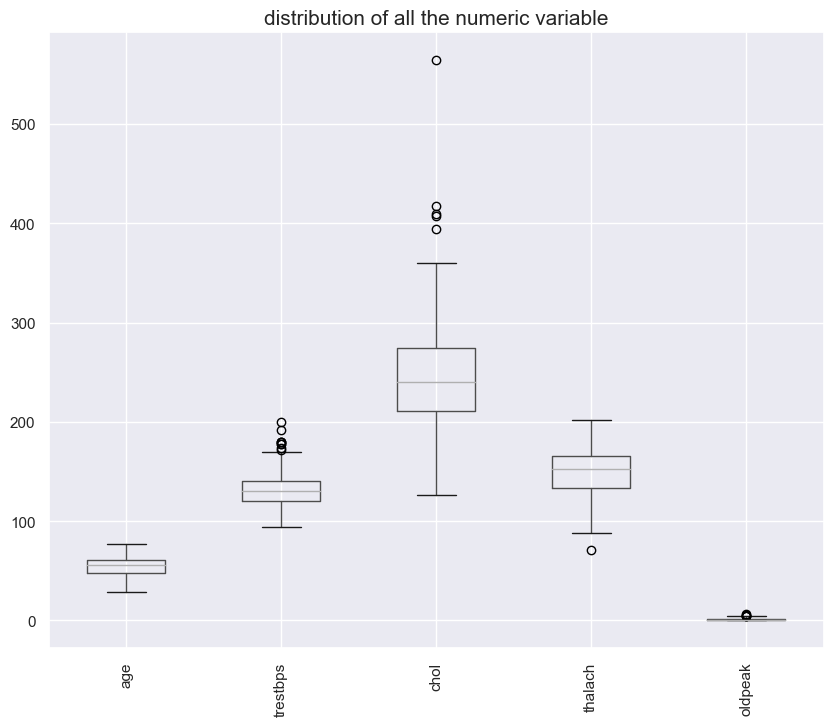

In [70]:
plt.figure(figsize=(10,8))
df_num.boxplot()
plt.title('distribution of all the numeric variable',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [71]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

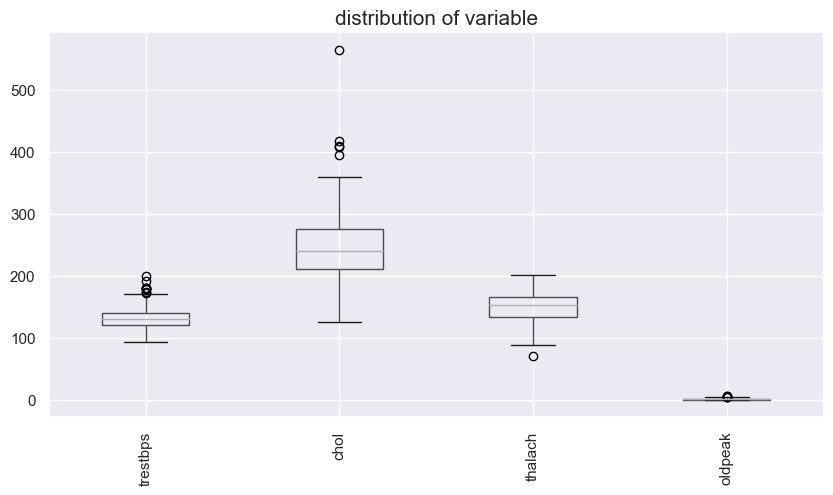

In [72]:
plt.figure(figsize=(10,5))
df.loc[:,['trestbps', 'chol','thalach','oldpeak']].boxplot()
plt.title('distribution of variable',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [73]:
df_num.skew()

age        -0.203743
trestbps    0.716541
chol        1.147332
thalach    -0.532671
oldpeak     1.266173
dtype: float64

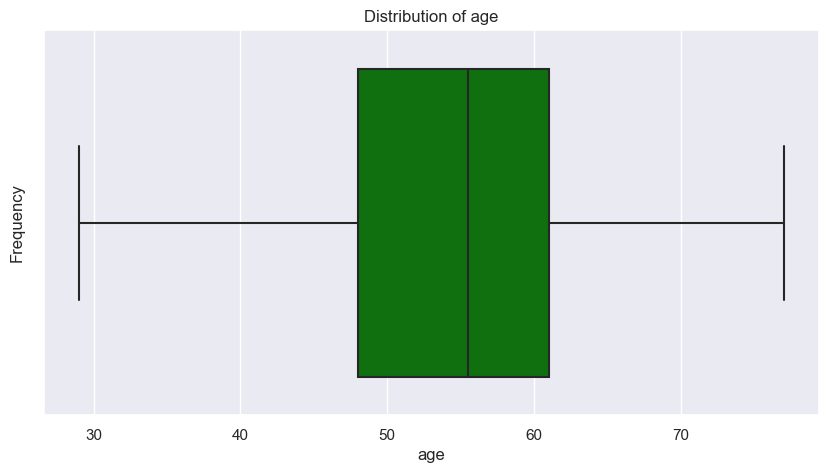

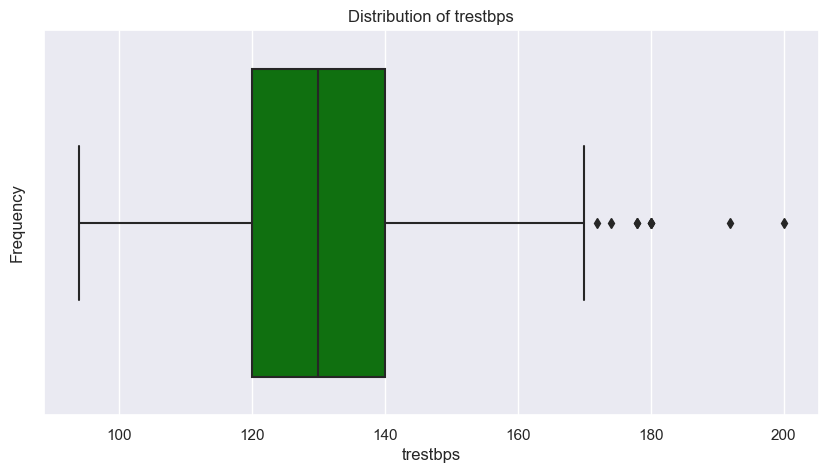

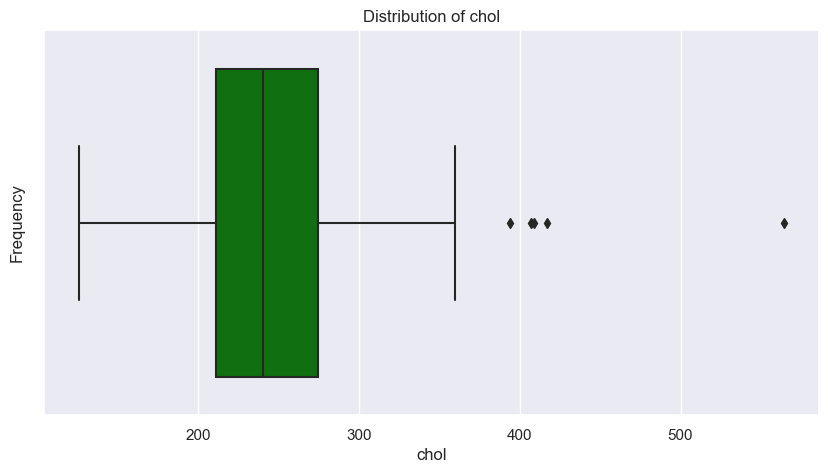

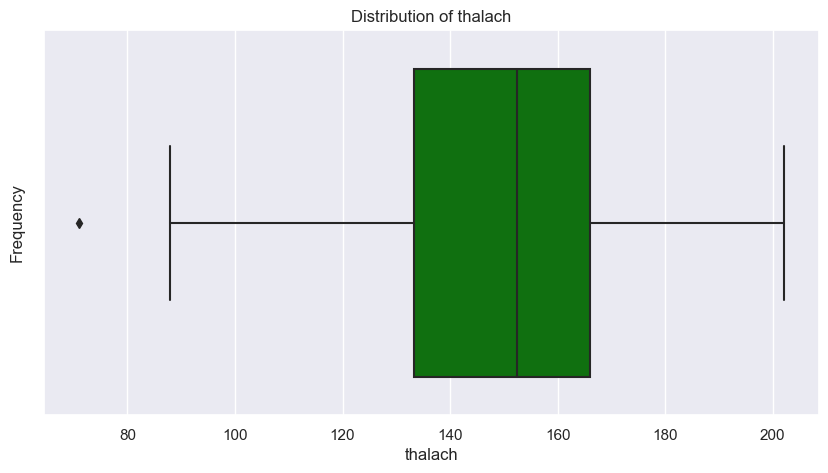

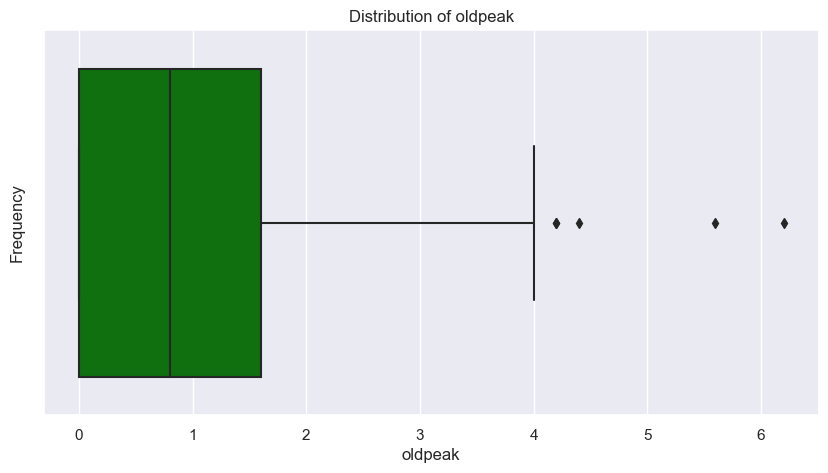

In [74]:
for col in df_num:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_num[col], color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    

In [75]:
df_num1=df_num.copy()

In [76]:
df_num1.shape

(302, 5)

In [77]:
q1 = df_num1.quantile(0.25)
q3 = df_num1.quantile(0.75)
IQR = q3 - q1
IQR

age         13.00
trestbps    20.00
chol        63.75
thalach     32.75
oldpeak      1.60
dtype: float64

In [78]:
df_num1=df_num1[~((df_num1<(q1-1.5* IQR)) | (df_num1 >(q3 + 1.5* IQR))).any(axis=1)]
df_num1.shape

(283, 5)

In [79]:
df_num1.skew()

age        -0.144382
trestbps    0.259175
chol        0.203702
thalach    -0.483509
oldpeak     0.924272
dtype: float64

In [80]:
df_num1.isnull().any()

age         False
trestbps    False
chol        False
thalach     False
oldpeak     False
dtype: bool

In [81]:
df_num1.shape

(283, 5)

# Encoding

In [82]:
df_cat.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0.0,1.0
1,1,2,0,1,0,0,0.0,2.0
2,0,1,0,0,0,2,0.0,2.0
3,1,1,0,1,0,2,0.0,2.0
4,0,0,0,1,1,2,0.0,2.0


In [83]:
df_cat.nunique()

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
ca         4
thal       4
dtype: int64

In [84]:
df_cat1=df_cat.copy()


In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [86]:
df_cat1['cp']=le.fit_transform(df_cat1['cp'])
df_cat1['restecg']=le.fit_transform(df_cat1['restecg'])
df_cat1['slope']=le.fit_transform(df_cat1['slope'])
df_cat1['ca']=le.fit_transform(df_cat1['ca'])
df_cat1['thal']=le.fit_transform(df_cat1['thal'])

In [87]:
df_cat1.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], dtype='object')

In [88]:
columns_to_dummy=['sex','fbs','exang']
dummy_var=pd.get_dummies(df_cat1[columns_to_dummy],drop_first=False)
dummy_var=dummy_var.astype(int)
df_dummy=pd.concat([df_cat1.drop(columns=columns_to_dummy),dummy_var],axis=1)
df_dummy.head()


,cp,restecg,slope,ca,thal,sex_0,sex_1,fbs_0,fbs_1,exang_0,exang_1
0,3,0,0,0,0,0,1,0,1,1,0
1,2,1,0,0,1,0,1,1,0,1,0
2,1,0,2,0,1,1,0,1,0,1,0
3,1,1,2,0,1,0,1,1,0,1,0
4,0,1,2,0,1,1,0,1,0,0,1


In [89]:
feature_var = pd.concat([df_dummy, df_num1], axis=1)

In [90]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
feature_var_imputed = imputer.fit_transform(feature_var)


In [91]:
print("Shape after handling NaN values:", feature_var_imputed.shape)

Shape after handling NaN values: (302, 16)


In [92]:
target_var=df['target']
target_var.shape

(302,)

In [93]:
if target_var.dtype not in [np.int64, np.int32, np.float64, np.float32]:
    target_var = pd.Categorical(target_var).codes


# Train-Test split

In [94]:
x=feature_var_imputed.copy()
y=target_var.copy()

In [95]:
x.shape

(302, 16)

In [96]:
y.shape

(302,)

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 16)
(61, 16)
(241,)
(61,)


# Feature_scaling

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled.shape                                 

(241, 16)

In [100]:
x_test_scaled.shape 

(61, 16)

# Model_Building

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [102]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(x_test_scaled)
y_pred_logistic

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

Calculate performance measures on the test set.

In [103]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.8524590163934426
[[22  7]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        29
           1       0.81      0.94      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



             Predicted: No  Predicted: Yes
Actual: No              22               7
Actual: Yes              2              30


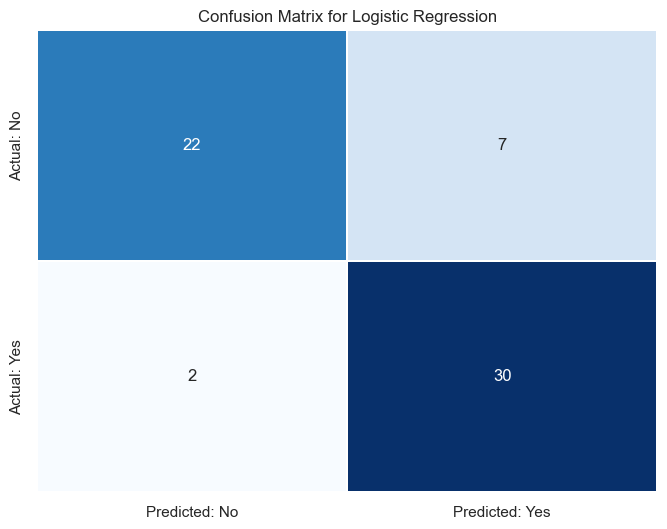

In [104]:
cmlog = confusion_matrix(y_test, y_pred_logistic)

cm_mar_log = pd.DataFrame(data=cmlog, columns=['Predicted: No', 'Predicted: Yes'],
                          index=['Actual: No', 'Actual: Yes'])
print(cm_mar_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mar_log, annot=True, fmt='d', cbar=False, linewidths=0.1, cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


evaluate the performance of a classification model

In [105]:
tn = cmlog[0][0]
fp = cmlog[0][1]
fn = cmlog[1][0]
tp = cmlog[1][1]

sensitivity = tp / (tp + fn)
specificity = tn / (tp + fp)
mis = (fp + fn) / (tn + fp + fn + tp)
correct = (tp + tn) / (tn + fp + fn + tp)

print(sensitivity)
print(specificity)
print(mis)
print(correct)

0.9375
0.5945945945945946
0.14754098360655737
0.8524590163934426


In [106]:
from sklearn.metrics import cohen_kappa_score
kappa_log = cohen_kappa_score(y_test, y_pred_logistic)
print('kappa value logistic regression:',kappa_log)

kappa value logistic regression: 0.7017925040738728


In [107]:
from sklearn.metrics import roc_curve,roc_auc_score

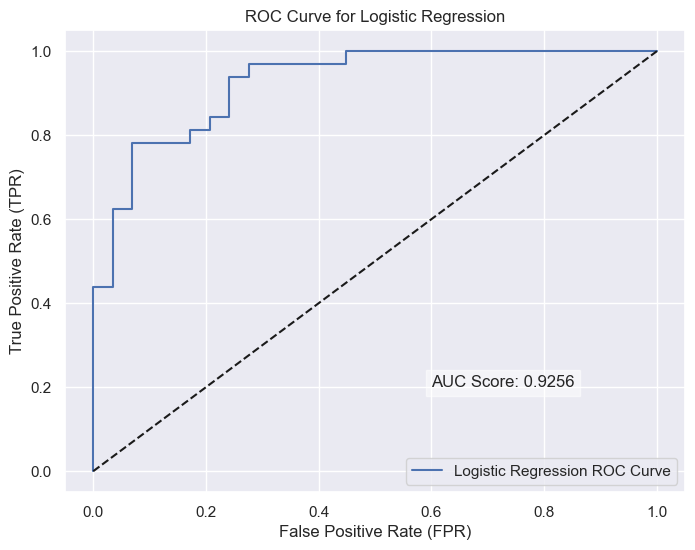

In [108]:
y_pred_prob = logistic_model.predict_proba(x_test_scaled)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob)

auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.text(x=0.6, y=0.2, s=f'AUC Score: {auc_score:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()

In [109]:
from sklearn.feature_selection import RFE

In [110]:
feature_names = ['cp', 'ca', 'oldpeak', 'age', 'thalach', 'chol', 'thal', 'trestbps', 'exang_0','exang_1', 'sex_1', 'restecg', 'slope', 'sex_0', 'fbs_0', 'fbs_1']

In [111]:
x_train_rfe = x_train_scaled
x_test_rfe = x_test_scaled

logreg = LogisticRegression()

rfe_model = RFE(estimator=logreg, n_features_to_select=5)
rfe_model = rfe_model.fit(x_train_rfe, y_train)
feat_index = pd.Series(data=rfe_model.ranking_, index=feature_names)
signi_feat_rfe = feat_index[feat_index == 1].index

print(signi_feat_rfe)

Index(['cp', 'age', 'thalach', 'thal', 'fbs_1'], dtype='object')


In [112]:
import statsmodels
import statsmodels.api as sm

In [113]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=feature_names)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=feature_names)


signi_feat_rfe = ['cp', 'age', 'thalach', 'thal', 'fbs_1']
x_train_rfe = x_train_scaled_df[signi_feat_rfe]
x_test_rfe = x_test_scaled_df[signi_feat_rfe]

y_train_aligned, x_train_rfe_aligned = y_train.align(x_train_rfe, join='inner', axis=0)

import statsmodels.api as sm
logreg_rfe = sm.Logit(y_train_aligned, sm.add_constant(x_train_rfe_aligned)).fit()
print(logreg_rfe.summary())


Optimization terminated successfully.
         Current function value: 0.602744
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  189
Model:                          Logit   Df Residuals:                      183
Method:                           MLE   Df Model:                            5
Date:                Wed, 18 Sep 2024   Pseudo R-squ.:                 0.01545
Time:                        22:22:55   Log-Likelihood:                -113.92
converged:                       True   LL-Null:                       -115.71
Covariance Type:            nonrobust   LLR p-value:                    0.6120
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8639      0.162      5.338      0.000       0.547       1.181
cp             0.0163      0.

In [114]:
logreg_sklearn = LogisticRegression()
logreg_sklearn.fit(x_train_rfe, y_train)
y_pred_logistic_rfe = logreg_sklearn.predict(x_test_rfe)

print(f'Accuracy: {accuracy_score(y_test, y_pred_logistic_rfe)}')
print(classification_report(y_test, y_pred_logistic_rfe))


Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        29
           1       0.81      0.94      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



             Predicted: No  Predicted: Yes
Actual: No              22               7
Actual: Yes              2              30


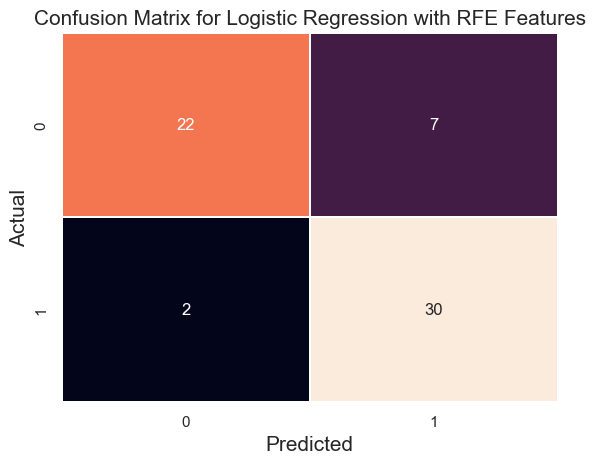

In [115]:
# Confusion Matrix
cmlog_rfe = confusion_matrix(y_test, y_pred_logistic_rfe)
cm_mar_log_rfe = pd.DataFrame(data = cmlog_rfe, columns = ['Predicted: No', 'Predicted: Yes'],
                              index = ['Actual: No', 'Actual: Yes'])
print(cm_mar_log_rfe)

sns.heatmap(cmlog_rfe, annot=True, fmt='d', cbar=False, linewidths=0.1)
plt.title('Confusion Matrix for Logistic Regression with RFE Features', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.show()

In [116]:
kappa_log_rfe = cohen_kappa_score(y_test, y_pred_logistic_rfe)
print('kappa value RFE logistic regression:',kappa_log_rfe)

kappa value RFE logistic regression: 0.7017925040738728


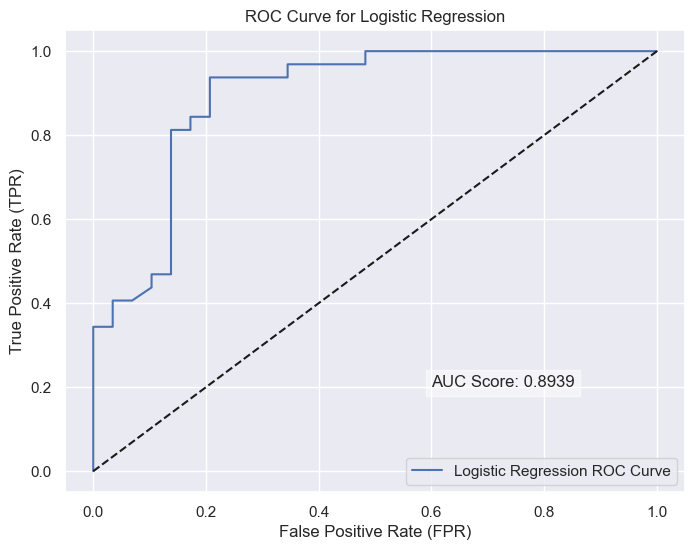

In [117]:
y_pred_prob = logreg_sklearn.predict_proba(x_test_rfe)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.text(x=0.6, y=0.2, s=f'AUC Score: {auc_score:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()

# Random-Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier


In [119]:
rf_classifier=RandomForestClassifier(n_estimators=10,random_state=10)
rf_model=rf_classifier.fit(x_train,y_train)

In [120]:
y_pred_rf = rf_model.predict(x_test)


In [121]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [122]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8032786885245902
[[23  6]
 [ 6 26]]


             Predicted: No  Predicted: Yes
Actual: No              23               6
Actual: Yes              6              26


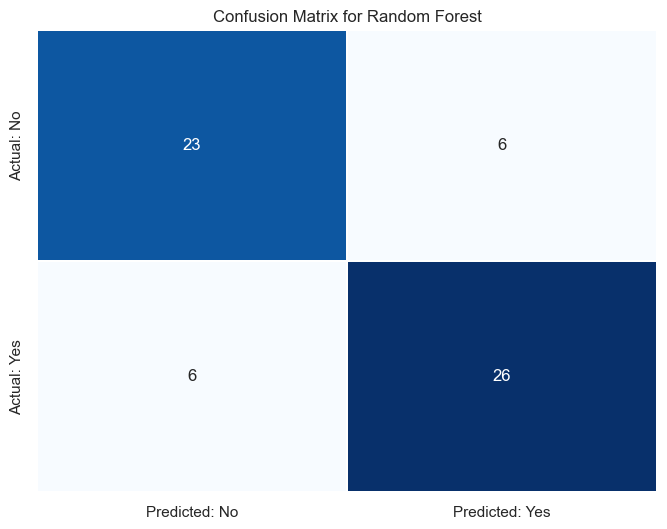

In [123]:
cmrf = confusion_matrix(y_test, y_pred_rf)

cm_mar_rf = pd.DataFrame(data=cmrf, columns=['Predicted: No', 'Predicted: Yes'],
                          index=['Actual: No', 'Actual: Yes'])
print(cm_mar_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mar_rf, annot=True, fmt='d', cbar=False, linewidths=0.1, cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [124]:
tn = cmrf[0][0]
fp = cmrf[0][1]
fn = cmrf[1][0]
tp = cmrf[1][1]

sensitivity = tp / (tp + fn)
specificity = tn / (tp + fp)
mis = (fp + fn) / (tn + fp + fn + tp)
correct = (tp + tn) / (tn + fp + fn + tp)

print(sensitivity)
print(specificity)
print(mis)
print(correct)

0.8125
0.71875
0.19672131147540983
0.8032786885245902


In [125]:
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)
print('kappa value logistic regression:',kappa_rf)

kappa value logistic regression: 0.6056034482758621


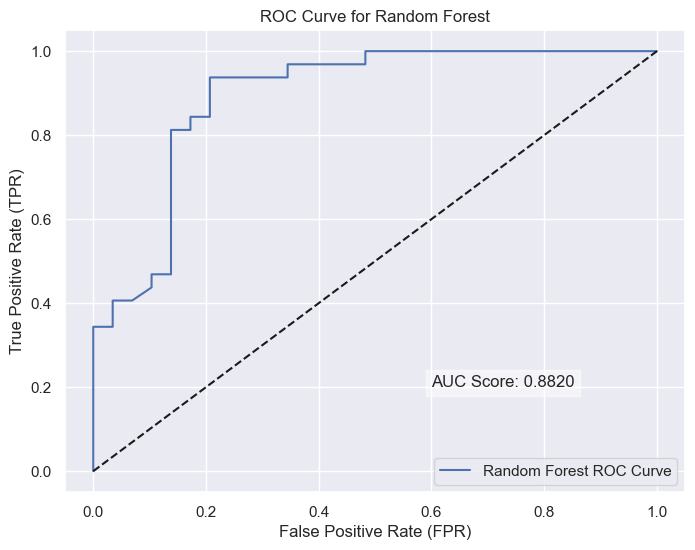

In [126]:
y_pred_prob_rf = rf_model.predict_proba(x_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

auc_score = roc_auc_score(y_test, y_pred_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='Random Forest ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.text(x=0.6, y=0.2, s=f'AUC Score: {auc_score:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()

# Importance _feature_Random_Forest

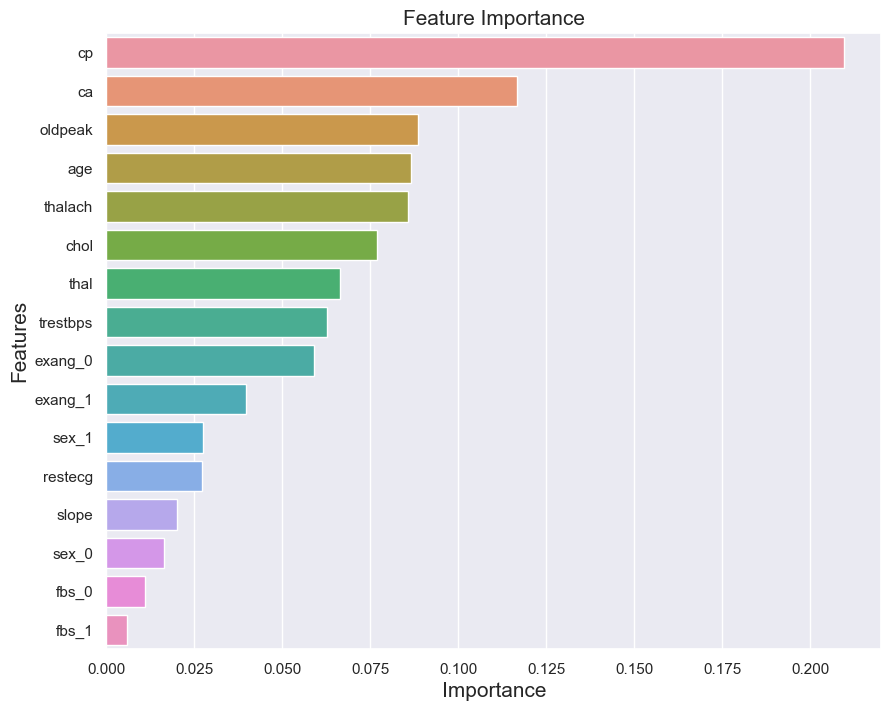

In [127]:
feature_names = feature_var.columns

important_features = pd.DataFrame({'Features': feature_names, 
                                   'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Features', data=important_features)
plt.title('Feature Importance', fontsize=15)
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.show()

# Decision-Tree Classification

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
dt_model = decision_tree_classification.fit(x_train, y_train)

In [130]:
y_pred_dt = dt_model.predict(x_test)

In [131]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        29
           1       0.76      0.69      0.72        32

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [132]:
print("Decision tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision tree Accuracy: 0.7213114754098361
Confusion Matrix:
[[22  7]
 [10 22]]


             Predicted: No  Predicted: Yes
Actual: No              22               7
Actual: Yes             10              22


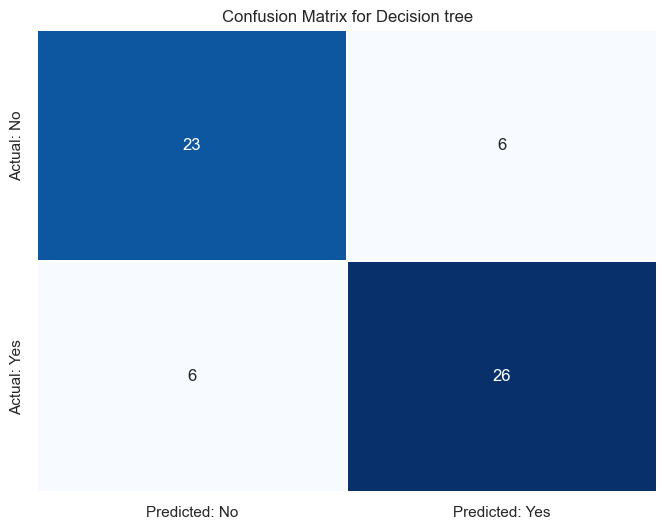

In [133]:
cmdt = confusion_matrix(y_test, y_pred_dt)

cm_mar_dt = pd.DataFrame(data=cmdt, columns=['Predicted: No', 'Predicted: Yes'],
                          index=['Actual: No', 'Actual: Yes'])
print(cm_mar_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mar_rf, annot=True, fmt='d', cbar=False, linewidths=0.1, cmap='Blues')
plt.title('Confusion Matrix for Decision tree')
plt.show()

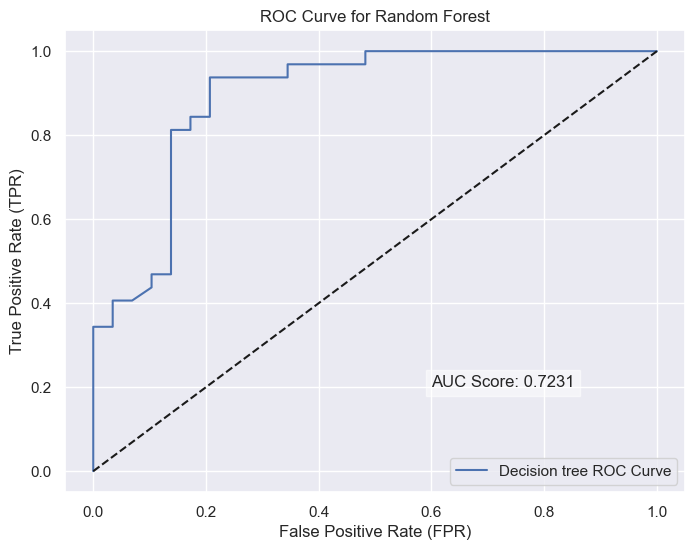

In [134]:
y_pred_prob_dt = dt_model.predict_proba(x_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)

auc_score = roc_auc_score(y_test, y_pred_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='Decision tree ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.text(x=0.6, y=0.2, s=f'AUC Score: {auc_score:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()